# Unsupervised Learning

For this project "NJ Transit + Amtrak (NEC) Rail Performance" dataset is used, which was downloaded from Kaggle website under the following address. [Link](https://www.kaggle.com/pranavbadami/nj-transit-amtrak-nec-performance)<br>NJ Transit is the second largest commuter rail network in the United States by ridership; it spans New Jersey and connects the state to New York City. On the Northeast Corridor, the busiest passenger rail line in the United States, Amtrak also operates passenger rail service; together, NJ Transit and Amtrak operate nearly 750 trains across the NJ Transit rail network.

### Import the relevant libraries

In [56]:
# Set up environment by importing required libraries

import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sb
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import math
#import graphviz
from datetime import datetime as dt
from datetime import datetime,date
from sklearn.feature_selection import SelectKBest, chi2
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics, model_selection
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn import svm, datasets
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import pairwise_distances
from itertools import cycle
from sklearn import datasets
from sklearn.manifold import TSNE
#import umap
from sklearn.mixture import GaussianMixture
import time
import warnings
warnings.filterwarnings("ignore")

## Load the Data

In [4]:
#reading the data

data = pd.read_csv("Amtrak-Rail-Performance.csv")

## Exploratory Data Analysis

In [5]:
data

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
0,2018-03-01,3805,1.0,New York Penn Station,105,New York Penn Station,105,2018-03-02 01:22:00,2018-03-02 01:21:05,0.000000,departed,Northeast Corrdr,NJ Transit
1,2018-03-01,3805,2.0,New York Penn Station,105,Secaucus Upper Lvl,38187,2018-03-02 01:31:00,2018-03-02 01:31:08,0.133333,departed,Northeast Corrdr,NJ Transit
2,2018-03-01,3805,3.0,Secaucus Upper Lvl,38187,Newark Penn Station,107,2018-03-02 01:40:00,2018-03-02 01:40:07,0.116667,departed,Northeast Corrdr,NJ Transit
3,2018-03-01,3805,4.0,Newark Penn Station,107,Newark Airport,37953,2018-03-02 01:45:00,2018-03-02 01:45:10,0.166667,departed,Northeast Corrdr,NJ Transit
4,2018-03-01,3805,5.0,Newark Airport,37953,North Elizabeth,109,2018-03-02 01:49:00,2018-03-02 01:49:10,0.166667,departed,Northeast Corrdr,NJ Transit
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256503,2018-03-31,0534,2.0,Bay Street,14,Glen Ridge,50,2018-03-31 19:02:00,2018-03-31 19:05:07,3.116667,departed,Montclair-Boonton,NJ Transit
256504,2018-03-31,0534,3.0,Glen Ridge,50,Bloomfield,19,2018-03-31 19:05:00,2018-03-31 19:08:06,3.100000,departed,Montclair-Boonton,NJ Transit
256505,2018-03-31,0534,4.0,Bloomfield,19,Watsessing Avenue,154,2018-03-31 19:07:00,2018-03-31 19:10:11,3.183333,departed,Montclair-Boonton,NJ Transit
256506,2018-03-31,0534,5.0,Watsessing Avenue,154,Newark Broad Street,106,2018-03-31 19:13:00,2018-03-31 19:21:02,8.033333,departed,Montclair-Boonton,NJ Transit


By looking at the features, we can notice that there are some features that are not useful in our ananlysis. So I am going to drop them.

In [6]:
#dropping some features

data = data.drop(['train_id', 'from_id', 'to_id','scheduled_time', 'actual_time'], axis =1)

In [7]:
# Get to know the data a bit and check the structure of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256508 entries, 0 to 256507
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           256508 non-null  object 
 1   stop_sequence  243028 non-null  float64
 2   from           256508 non-null  object 
 3   to             256508 non-null  object 
 4   delay_minutes  243028 non-null  float64
 5   status         256508 non-null  object 
 6   line           256508 non-null  object 
 7   type           256508 non-null  object 
dtypes: float64(2), object(6)
memory usage: 15.7+ MB


In [8]:
data

,date,stop_sequence,from,to,delay_minutes,status,line,type
0,2018-03-01,1.0,New York Penn Station,New York Penn Station,0.000000,departed,Northeast Corrdr,NJ Transit
1,2018-03-01,2.0,New York Penn Station,Secaucus Upper Lvl,0.133333,departed,Northeast Corrdr,NJ Transit
2,2018-03-01,3.0,Secaucus Upper Lvl,Newark Penn Station,0.116667,departed,Northeast Corrdr,NJ Transit
3,2018-03-01,4.0,Newark Penn Station,Newark Airport,0.166667,departed,Northeast Corrdr,NJ Transit
4,2018-03-01,5.0,Newark Airport,North Elizabeth,0.166667,departed,Northeast Corrdr,NJ Transit
...,...,...,...,...,...,...,...,...
256503,2018-03-31,2.0,Bay Street,Glen Ridge,3.116667,departed,Montclair-Boonton,NJ Transit
256504,2018-03-31,3.0,Glen Ridge,Bloomfield,3.100000,departed,Montclair-Boonton,NJ Transit
256505,2018-03-31,4.0,Bloomfield,Watsessing Avenue,3.183333,departed,Montclair-Boonton,NJ Transit
256506,2018-03-31,5.0,Watsessing Avenue,Newark Broad Street,8.033333,departed,Montclair-Boonton,NJ Transit


### Checking the null values

In [9]:
#Before moving forward, let's check if there is any null or missing values

data.isnull().sum()

date                 0
stop_sequence    13480
from                 0
to                   0
delay_minutes    13480
status               0
line                 0
type                 0
dtype: int64

In [10]:
#let's see the percentage of null values

data.isnull().sum()*100/data.isnull().count()

date             0.000000
stop_sequence    5.255197
from             0.000000
to               0.000000
delay_minutes    5.255197
status           0.000000
line             0.000000
type             0.000000
dtype: float64

There are 13480 null values in <b>stop_sequence</b> and <b>delay_minutes</b> features. Let's dive in further and see what is wrong! By looking at the actual dataset, we can see that the null values are jut blank cells and all of them belong to "Amtrak", under the <b>type</b> feature. Therefore, I have decided to drop them all as it is only <b>5.25%</b> of whole datase and also we are only focusing on <b>NJ Transit</b>.

In [11]:
data.type.unique()

array(['NJ Transit', 'Amtrak'], dtype=object)

In [12]:
#drop the null values

data = data.dropna(axis = 0, how ='any')

In [13]:
data

,date,stop_sequence,from,to,delay_minutes,status,line,type
0,2018-03-01,1.0,New York Penn Station,New York Penn Station,0.000000,departed,Northeast Corrdr,NJ Transit
1,2018-03-01,2.0,New York Penn Station,Secaucus Upper Lvl,0.133333,departed,Northeast Corrdr,NJ Transit
2,2018-03-01,3.0,Secaucus Upper Lvl,Newark Penn Station,0.116667,departed,Northeast Corrdr,NJ Transit
3,2018-03-01,4.0,Newark Penn Station,Newark Airport,0.166667,departed,Northeast Corrdr,NJ Transit
4,2018-03-01,5.0,Newark Airport,North Elizabeth,0.166667,departed,Northeast Corrdr,NJ Transit
...,...,...,...,...,...,...,...,...
256503,2018-03-31,2.0,Bay Street,Glen Ridge,3.116667,departed,Montclair-Boonton,NJ Transit
256504,2018-03-31,3.0,Glen Ridge,Bloomfield,3.100000,departed,Montclair-Boonton,NJ Transit
256505,2018-03-31,4.0,Bloomfield,Watsessing Avenue,3.183333,departed,Montclair-Boonton,NJ Transit
256506,2018-03-31,5.0,Watsessing Avenue,Newark Broad Street,8.033333,departed,Montclair-Boonton,NJ Transit


In [14]:
#Let's see the distribution of "status" feature

data.status.value_counts(normalize = True)

departed     0.895177
estimated    0.087389
cancelled    0.017434
Name: status, dtype: float64

As we can see, <b>89%</b> of trains departed on time, <b>9%</b> of them delayed and <b>2%</b> of them cancelled.

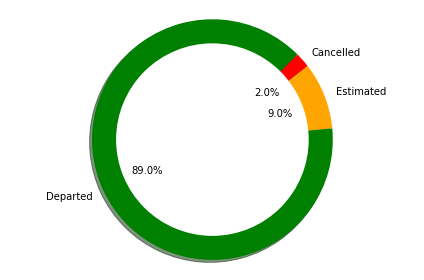

In [15]:
#And we can see the distribution of status visually

labels = 'Departed', 'Estimated', 'Cancelled'
sizes = [89, 9, 2]

#add colors
colors = ['green','orange','red']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=45)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

Now, let's see the distribution of status with respect to line!

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

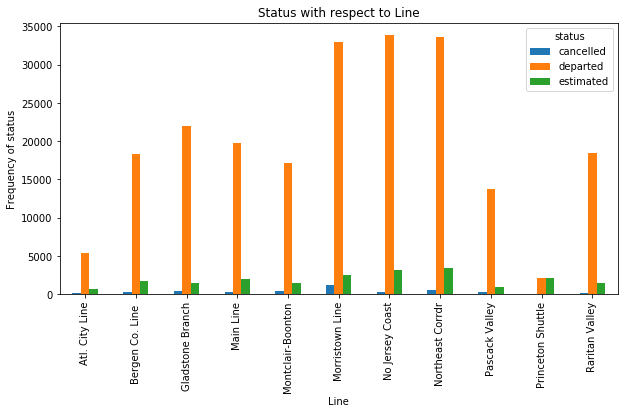

In [16]:
#we can see the distribution of status with respect to line

pd.crosstab(data.line, data.status).plot(kind = 'bar',figsize=(10, 5))

plt.title('Status with respect to Line')
plt.xlabel('Line')
plt.ylabel('Frequency of status')

plt.xticks(rotation = 90)

Above plot shows that the most active lines are <b>No Jersey Coast</b>, <b>Northeast Corrdr</b> and <b>Morristown Line</b> respectively. <b>Princeton Shuttle</b> has the lowest transportation, but it is the only one with no cancelation. As we only have 2% of cancelled transition, I decided to remove all the "status" feature that are "cancelled" and do the analysis without it.

In [17]:
#let's remove the rows that has cancelled status

data = data[data.status != 'cancelled']

In [18]:
#let's double check that it is removed completely

data.status.unique()

array(['departed', 'estimated'], dtype=object)

As the main research question in this analysis is to see whether a train is late or not and group them based on that, I am going to focus on <b>"delay_minutes"</b> feature. Let's say any train that departs <b>ten minutes</b> late, we consider that as a <b>delayed</b> train and any train that departs below ten minutes delay are concidered <b>on-time</b>. So let's add another column based on delay_minutes feature and divided into <b>on-time</b> and <b>delayed</b> category.

In [19]:
data['departure'] = ['on-time' if x <= 10 else 'delayed' for x in data['delay_minutes']]

In [20]:
#Let's see the distribution of new feature

data.departure.value_counts(normalize = True)

on-time    0.932782
delayed    0.067218
Name: departure, dtype: float64

<b>93%</b> of trains are on-time and <b>7%</b> of trains are delayed.

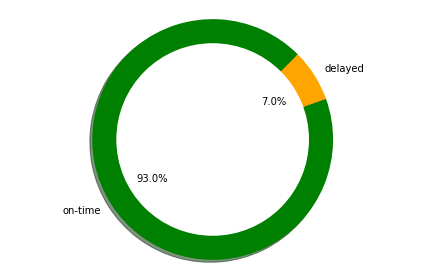

In [21]:
#And we can see the distribution of "departure" visually

labels = 'on-time', 'delayed'
sizes = [93, 7]

#add colors
colors = ['green','orange']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=45)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

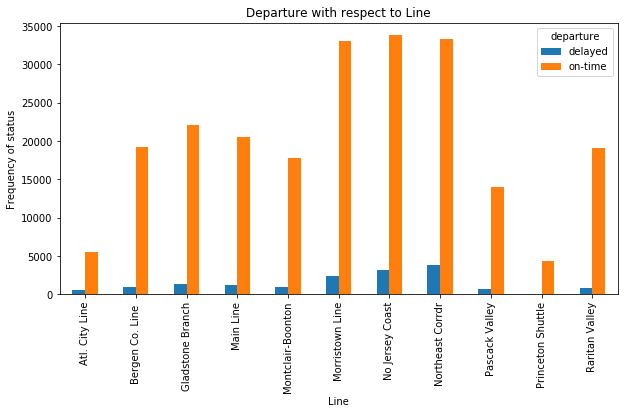

In [22]:
#we can see the distribution of departure with respect to line

pd.crosstab(data.line, data.departure).plot(kind = 'bar',figsize=(10, 5))

plt.title('Departure with respect to Line')
plt.xlabel('Line')
plt.ylabel('Frequency of status')

plt.xticks(rotation = 90)

Above plot shows that <b>No Jersey Coast</b> is the most on-time train line and <b>Northeast Corrdr</b> line has the most delayed departure.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

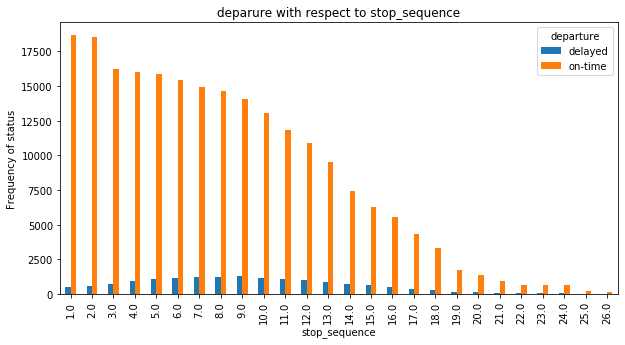

In [23]:
#we can see the distribution of departure with respect to stop sequence

pd.crosstab(data.stop_sequence, data.departure).plot(kind = 'bar',figsize=(10, 5))

plt.title('deparure with respect to stop_sequence')
plt.xlabel('stop_sequence')
plt.ylabel('Frequency of status')

plt.xticks(rotation = 90)

We can see that the most on-time trains are the one with one or two stop sequence and it makes sense as the stop_sequences increased, the delay time increased too.

Now, let's drop the status and type features that are not useful for further analysis.

In [24]:
#dropping some features

data = data.drop(['status', 'type'], axis =1)

As I am curious about the date, lets split the date feature and create three separate columns for year, month and day and then I will drop the date feature.

In [25]:
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month
data['day'] = pd.DatetimeIndex(data['date']).day

In [26]:
data.year.unique()

array([2018])

In [27]:
data.month.unique()

array([3])

We can see that all the dates are for March 2018 only, so basically I am going to drop the year and month columns.

In [28]:
#dropping date features

data = data.drop(['date', 'year', 'month'], axis =1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238791 entries, 0 to 256507
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   stop_sequence  238791 non-null  float64
 1   from           238791 non-null  object 
 2   to             238791 non-null  object 
 3   delay_minutes  238791 non-null  float64
 4   line           238791 non-null  object 
 5   departure      238791 non-null  object 
 6   day            238791 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 14.6+ MB


In [30]:
for column_name in data.columns:
    print("Unique values in column {} are: {}".format(column_name, data[column_name].unique()))

Unique values in column stop_sequence are: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26.]
Unique values in column from are: ['New York Penn Station' 'Secaucus Upper Lvl' 'Newark Penn Station'
 'Newark Airport' 'North Elizabeth' 'Elizabeth' 'Linden' 'Rahway'
 'Metropark' 'Metuchen' 'Edison' 'New Brunswick' 'Jersey Avenue'
 'Princeton Junction' 'Hamilton' 'Bay Head' 'Point Pleasant Beach'
 'Manasquan' 'Spring Lake' 'Belmar' 'Bradley Beach' 'Asbury Park'
 'Allenhurst' 'Elberon' 'Long Branch' 'Little Silver' 'Red Bank'
 'Middletown NJ' 'Aberdeen-Matawan' 'South Amboy' 'Woodbridge' 'Hoboken'
 'Secaucus Lower Lvl' 'Kingsland' 'Lyndhurst' 'Delawanna' 'Passaic'
 'Clifton' 'Paterson' 'Hawthorne' 'Glen Rock Main Line' 'Ridgewood'
 'Ho-Ho-Kus' 'Waldwick' 'Allendale' 'Ramsey Main St' 'Ramsey Route 17'
 'Mahwah' 'Suffern' 'Trenton' 'Newark Broad Street' 'East Orange'
 'Brick Church' 'Orange' 'Highland Avenue' 'Mountain Station'
 'South Ora

Let's see the distribution of delay with respect to day!

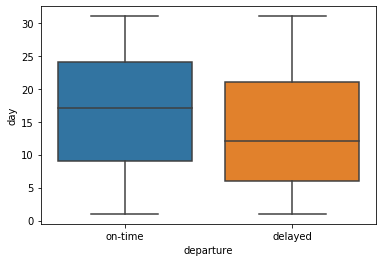

In [31]:
sns.boxplot(y = "day", x = "departure", data = data)

Above box plot shows the distribution of on-time and delayed trains during the days.

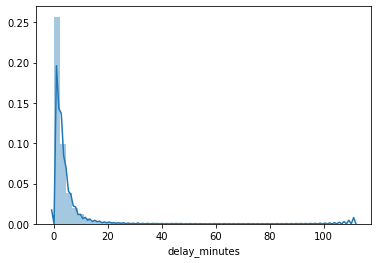

In [32]:
sb.distplot(data['delay_minutes'])

Above plot shows that the most delayed period is under ten minutes.

In [33]:
data.head()

,stop_sequence,from,to,delay_minutes,line,departure,day
0,1.0,New York Penn Station,New York Penn Station,0.000000,Northeast Corrdr,on-time,1
1,2.0,New York Penn Station,Secaucus Upper Lvl,0.133333,Northeast Corrdr,on-time,1
2,3.0,Secaucus Upper Lvl,Newark Penn Station,0.116667,Northeast Corrdr,on-time,1
3,4.0,Newark Penn Station,Newark Airport,0.166667,Northeast Corrdr,on-time,1
4,5.0,Newark Airport,North Elizabeth,0.166667,Northeast Corrdr,on-time,1


### Map the Data

In [34]:
data_mapped = data.copy()
data_mapped['departure']=data_mapped['departure'].map({'on-time':0, 'delayed':1})

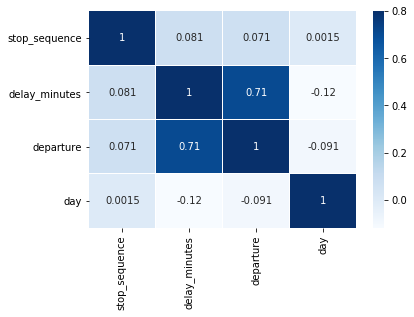

In [35]:
#Correlation Plot
corr=data_mapped.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(6, 4))

#Draw the heatmap using seaborn
colormap = plt.cm.Blues
sns.heatmap(corr, linewidths=0.1, cmap = colormap, linecolor = 'White', vmax=0.8, annot=True)

In [36]:
#hard encoding the data

data_mapped = pd.get_dummies(data_mapped)

In [37]:
data_mapped

,stop_sequence,delay_minutes,departure,day,from_Aberdeen-Matawan,from_Absecon,from_Allendale,from_Allenhurst,from_Anderson Street,from_Annandale,...,line_Bergen Co. Line,line_Gladstone Branch,line_Main Line,line_Montclair-Boonton,line_Morristown Line,line_No Jersey Coast,line_Northeast Corrdr,line_Pascack Valley,line_Princeton Shuttle,line_Raritan Valley
0,1.0,0.000000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2.0,0.133333,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3.0,0.116667,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4.0,0.166667,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5.0,0.166667,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256503,2.0,3.116667,0,31,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
256504,3.0,3.100000,0,31,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
256505,4.0,3.183333,0,31,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
256506,5.0,8.033333,0,31,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


As we can see above, index number and number of rows are not match. So, let's reset the index!

In [38]:
data_mapped.reset_index(inplace=True)

In [39]:
data_mapped.drop(data_mapped.tail(1).index,inplace=True)

In [40]:
data_mapped

,index,stop_sequence,delay_minutes,departure,day,from_Aberdeen-Matawan,from_Absecon,from_Allendale,from_Allenhurst,from_Anderson Street,...,line_Bergen Co. Line,line_Gladstone Branch,line_Main Line,line_Montclair-Boonton,line_Morristown Line,line_No Jersey Coast,line_Northeast Corrdr,line_Pascack Valley,line_Princeton Shuttle,line_Raritan Valley
0,0,1.0,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,2.0,0.133333,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,3.0,0.116667,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,4.0,0.166667,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,5.0,0.166667,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238785,256502,1.0,0.000000,0,31,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
238786,256503,2.0,3.116667,0,31,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
238787,256504,3.0,3.100000,0,31,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
238788,256505,4.0,3.183333,0,31,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
#now that we fix the index number, let's drop the level_0 column!

data_mapped = data_mapped.drop(['index'], axis =1)

In [42]:
data_mapped

,stop_sequence,delay_minutes,departure,day,from_Aberdeen-Matawan,from_Absecon,from_Allendale,from_Allenhurst,from_Anderson Street,from_Annandale,...,line_Bergen Co. Line,line_Gladstone Branch,line_Main Line,line_Montclair-Boonton,line_Morristown Line,line_No Jersey Coast,line_Northeast Corrdr,line_Pascack Valley,line_Princeton Shuttle,line_Raritan Valley
0,1.0,0.000000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2.0,0.133333,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3.0,0.116667,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4.0,0.166667,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5.0,0.166667,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238785,1.0,0.000000,0,31,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
238786,2.0,3.116667,0,31,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
238787,3.0,3.100000,0,31,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
238788,4.0,3.183333,0,31,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Data Preprocessing, Feature Selection & Feature Importance

As the first step in our data preprocessing, we split the data into <b>Features</b> and <b>Target</b>. After this we split our data into <b>Training</b> and <b>Testing</b>.

In [43]:
#Splitting the data into features & target

X = data_mapped.loc[:,data_mapped.columns != 'departure']     #independent columns
y = data_mapped[["departure"]]      #target column

In [44]:
# setting up testing and training sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=0,stratify=y)

In [45]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                      Specs         Score
1             delay_minutes  1.498911e+06
2                       day  9.807349e+03
0             stop_sequence  3.902232e+03
340   line_Northeast Corrdr  7.348108e+02
318               to_Tuxedo  4.526461e+02
342  line_Princeton Shuttle  3.128929e+02
141         from_Sloatsburg  2.382318e+02
62             from_Hoboken  2.316925e+02
343     line_Raritan Valley  2.288687e+02
339    line_No Jersey Coast  2.228917e+02


As we can see from the <b>SelectKBest</b> output, the top two features that contribute most to the trains' delay are <b>delay_minutes</b> and <b>day</b>. The features that are not important can be eliminated from the model development.

In [46]:
#Now, we are going to delete the unwanted feaures
data_mapped.drop(data_mapped.columns.difference(['departure', 'delay_minutes','day','stop_sequence','line_Northeast Corrdr','to_Tuxedo','line_Princeton Shuttle','from_Sloatsburg','from_Hoboken','line_Raritan Valley','line_No Jersey Coast']),axis=1,inplace=True)

In [47]:
# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [0]
Test score:  0.9327861300724486


Above output shows that we have an accuracy of 93% without training a model.

In [48]:
X_train.shape

(167153, 344)

In [49]:
y_train.shape

(167153, 1)

## Principal Component Analysis (PCA)

In [50]:
# Standardizing the features

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [51]:
#applying the PCA

pca = PCA(n_components = 23)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

X_train_pca = pca.transform(X_train)

X_test_pca = pca.transform(X_test)

## Developing the Models

### Model 1 - Logistic Regression

In [50]:
lr = LogisticRegression(C=0.030999999999999996, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
lr.fit(X_train_pca,y_train)

y_pred_lr = lr.predict(X_test_pca)

train_acc_log = round((lr.score(X_train_pca, y_train))*100,1)
test_acc_log = round((lr.score(X_test_pca, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_log)
print('Test accuracy: %s %%' % test_acc_log)

Training accuracy: 65.9 %
Test accuracy: 18.5 %


In [51]:
cross_val_score(lr, X_train, y_train, cv=10)

array([0.98713807, 0.98630055, 0.98749701, 0.98516303, 0.98791505,
       0.98809453, 0.98552199, 0.98558181, 0.98522285, 0.98647921])

In [52]:
print(classification_report(y_test, y_pred_lr))

##Confusion matrix

print('Test set of confusion matrix:', '\n', 
      confusion_matrix(y_test, y_pred_lr, labels=None, sample_weight=None))

              precision    recall  f1-score   support

           0       1.00      0.13      0.22     66822
           1       0.08      1.00      0.14      4815

    accuracy                           0.19     71637
   macro avg       0.54      0.56      0.18     71637
weighted avg       0.94      0.19      0.22     71637

Test set of confusion matrix: 
 [[ 8446 58376]
 [    0  4815]]


### Model 2 - Gaussian Naive-Bayes

In [53]:
gaussian = GaussianNB(priors=None, var_smoothing=1e-09)

gaussian.fit(X_train_pca, y_train)

y_pred_gauss = gaussian.predict(X_test_pca)

train_acc_gauss = round((gaussian.score(X_train_pca, y_train))*100,1)
test_acc_gauss = round((gaussian.score(X_test_pca, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_gauss)
print('Test accuracy: %s %%' % test_acc_gauss)

Training accuracy: 91.6 %
Test accuracy: 93.3 %


In [54]:
cross_val_score(gaussian, X_train, y_train, cv=10)

array([0.34021297, 0.33518784, 0.35319454, 0.3480706 , 0.33969488,
       0.29267125, 0.31911457, 0.33957523, 0.31630272, 0.33161831])

In [55]:
print(classification_report(y_test, y_pred_gauss))

##Confusion matrix

print('Test set of confusion matrix:', '\n', 
      confusion_matrix(y_test, y_pred_gauss, labels=None, sample_weight=None))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     66822
           1       0.00      0.00      0.00      4815

    accuracy                           0.93     71637
   macro avg       0.47      0.50      0.48     71637
weighted avg       0.87      0.93      0.90     71637

Test set of confusion matrix: 
 [[66822     0]
 [ 4815     0]]


### Model 3 - Decision Tree Classifier

In [56]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=19, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
decision_tree.fit(X_train_pca, y_train)

y_pred_dtc = decision_tree.predict(X_test_pca)

train_acc_dtc = round((decision_tree.score(X_train_pca, y_train))*100,1)
test_acc_dtc = round((decision_tree.score(X_test_pca, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_dtc)
print('Test accuracy: %s %%' % test_acc_dtc)

Training accuracy: 98.3 %
Test accuracy: 74.7 %


In [57]:
cross_val_score(decision_tree, X_train, y_train, cv=10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [58]:
print(classification_report(y_test, y_pred_dtc))

##Confusion matrix

print('Test set of confusion matrix:', '\n', 
      confusion_matrix(y_test, y_pred_dtc, labels=None, sample_weight=None))

              precision    recall  f1-score   support

           0       0.98      0.74      0.85     66822
           1       0.19      0.82      0.30      4815

    accuracy                           0.75     71637
   macro avg       0.58      0.78      0.57     71637
weighted avg       0.93      0.75      0.81     71637

Test set of confusion matrix: 
 [[49549 17273]
 [  855  3960]]


### Model 4 - Random Forest Classifier

In [59]:
rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rfc.fit(X_train_pca,y_train)

y_pred_rfc = rfc.predict(X_test_pca)

train_acc_rfc = round((rfc.score(X_train_pca, y_train))*100,1)
test_acc_rfc = round((rfc.score(X_test_pca, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_rfc)
print('Test accuracy: %s %%' % test_acc_rfc)

Training accuracy: 99.9 %
Test accuracy: 30.2 %


In [60]:
cross_val_score(rfc, X_train, y_train, cv=10)

array([0.99946159, 0.9992223 , 0.99940177, 0.99970087, 0.99916243,
       0.99970087, 0.99916243, 0.9991026 , 0.99940173, 0.99916243])

In [61]:
print(classification_report(y_test, y_pred_rfc))

##Confusion matrix

print('Test set of confusion matrix:', '\n', 
      confusion_matrix(y_test, y_pred_rfc, labels=None, sample_weight=None))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40     66822
           1       0.09      1.00      0.16      4815

    accuracy                           0.30     71637
   macro avg       0.54      0.63      0.28     71637
weighted avg       0.94      0.30      0.39     71637

Test set of confusion matrix: 
 [[16788 50034]
 [    0  4815]]


According to above outputs of supervised models, Gaussian Naive-Bayes, is a good model to choose. The 'Training accuracy' and "Test accuracy' of this model is higher than others. Also the '10 Fold cross validation score' for this model shows that the accuracy of this model with cross validation is approximately 92.5%, which shows how effective the model is. In addition, based on the classification reports, Gaussian Naive-Bayes model has the best precision and recall values as we want these two values close to one(1) and close together. Also confusion matrix shows that Gaussian Naive-Bayes model has 66822 correct predictions vs. 4815 incorrect predictions.

## Clustering/Unsupervised Modeling

I used KMeans, GMM and MiniBatchKMeans as my techniques to begin my clustering.

In [52]:
data_mapped.head()

,stop_sequence,delay_minutes,departure,day,from_Hoboken,from_Sloatsburg,to_Tuxedo,line_No Jersey Coast,line_Northeast Corrdr,line_Princeton Shuttle,line_Raritan Valley
0,1.0,0.000000,0,1,0,0,0,0,1,0,0
1,2.0,0.133333,0,1,0,0,0,0,1,0,0
2,3.0,0.116667,0,1,0,0,0,0,1,0,0
3,4.0,0.166667,0,1,0,0,0,0,1,0,0
4,5.0,0.166667,0,1,0,0,0,0,1,0,0


In [53]:
#Splitting the data into features & target

X = data_mapped.iloc[:,0:2]     #independent columns

In [54]:
X.head()

,stop_sequence,delay_minutes
0,1.0,0.000000
1,2.0,0.133333
2,3.0,0.116667
3,4.0,0.166667
4,5.0,0.166667


In [64]:
#standardize our data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### Dimensionality Reduction with PCA

To plot in two-dimensional space, we need to reduce our data dimensionality. For this purpose, we apply PCA and use the first two principal components.

In [65]:
#contract the first two principal components

pca = PCA(n_components=2).fit_transform(X_std)

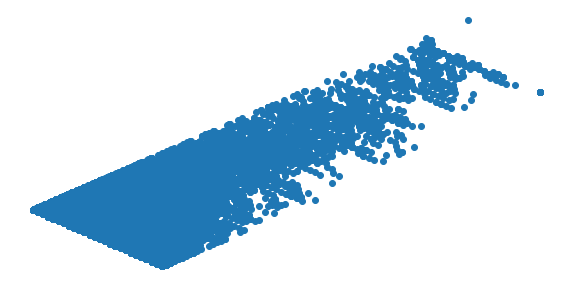

In [66]:
plt.figure(figsize=(10,5))
plt.scatter(pca[:,0], pca[:,1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

The graph above reveals how the two-dimensional representations of delay_minutes spread along the two axis. PCA retains the global similarity structure of the data and hence dissimilar objects tend to be located far away from each other. Also we can see clusters' division. 

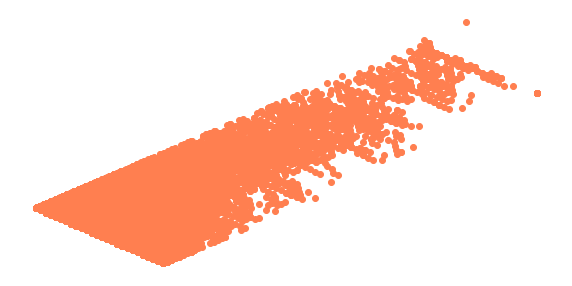

In [67]:
plt.figure(figsize=(10,5))
colours = 'coral'
for i in range(pca.shape[0]):
    plt.scatter(pca[i, 0], pca[i, 1],
             c=colours)

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### Dimensionality Reduction with t-SNE

In [68]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=350)
tsne_results = tsne.fit_transform(X_std)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 238790 samples in 1.135s...
[t-SNE] Computed neighbors for 238790 samples in 6.234s...
[t-SNE] Computed conditional probabilities for sample 1000 / 238790
[t-SNE] Computed conditional probabilities for sample 2000 / 238790
[t-SNE] Computed conditional probabilities for sample 3000 / 238790
[t-SNE] Computed conditional probabilities for sample 4000 / 238790
[t-SNE] Computed conditional probabilities for sample 5000 / 238790
[t-SNE] Computed conditional probabilities for sample 6000 / 238790
[t-SNE] Computed conditional probabilities for sample 7000 / 238790
[t-SNE] Computed conditional probabilities for sample 8000 / 238790
[t-SNE] Computed conditional probabilities for sample 9000 / 238790
[t-SNE] Computed conditional probabilities for sample 10000 / 238790
[t-SNE] Computed conditional probabilities for sample 11000 / 238790
[t-SNE] Computed conditional probabilities for sample 12000 / 238790
[t-SNE] Computed conditional probab

[t-SNE] Computed conditional probabilities for sample 120000 / 238790
[t-SNE] Computed conditional probabilities for sample 121000 / 238790
[t-SNE] Computed conditional probabilities for sample 122000 / 238790
[t-SNE] Computed conditional probabilities for sample 123000 / 238790
[t-SNE] Computed conditional probabilities for sample 124000 / 238790
[t-SNE] Computed conditional probabilities for sample 125000 / 238790
[t-SNE] Computed conditional probabilities for sample 126000 / 238790
[t-SNE] Computed conditional probabilities for sample 127000 / 238790
[t-SNE] Computed conditional probabilities for sample 128000 / 238790
[t-SNE] Computed conditional probabilities for sample 129000 / 238790
[t-SNE] Computed conditional probabilities for sample 130000 / 238790
[t-SNE] Computed conditional probabilities for sample 131000 / 238790
[t-SNE] Computed conditional probabilities for sample 132000 / 238790
[t-SNE] Computed conditional probabilities for sample 133000 / 238790
[t-SNE] Computed con

[t-SNE] KL divergence after 250 iterations with early exaggeration: 99.136490
[t-SNE] KL divergence after 350 iterations: 4.988966


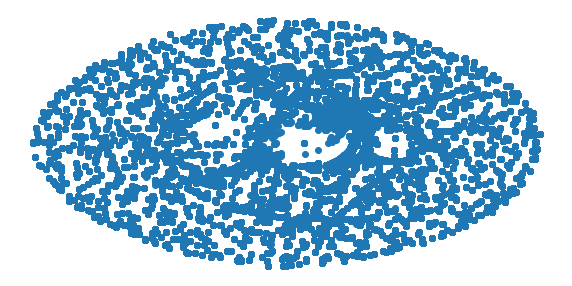

In [69]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:,0], tsne_results[:,1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

It is not clear on graph to see the clusters' division. One of the reasons could be the number of iterations in TSNE function. I checked 250 and 350 iterations and both of the executions took several hours to run. So, I decided to do not test any more.

### Dimensionality Reduction with UMAP

In [70]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

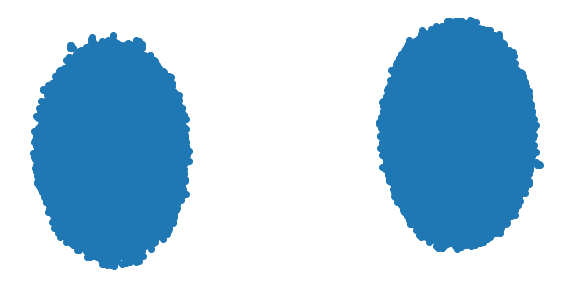

In [71]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:,0], umap_results[:,1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### K-means Clustering

We run K-means by setting n_clusters=2, since we have two classes of departure status for each train.

In [72]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

745 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Let's visualize the predictions and the true labels of the observations.

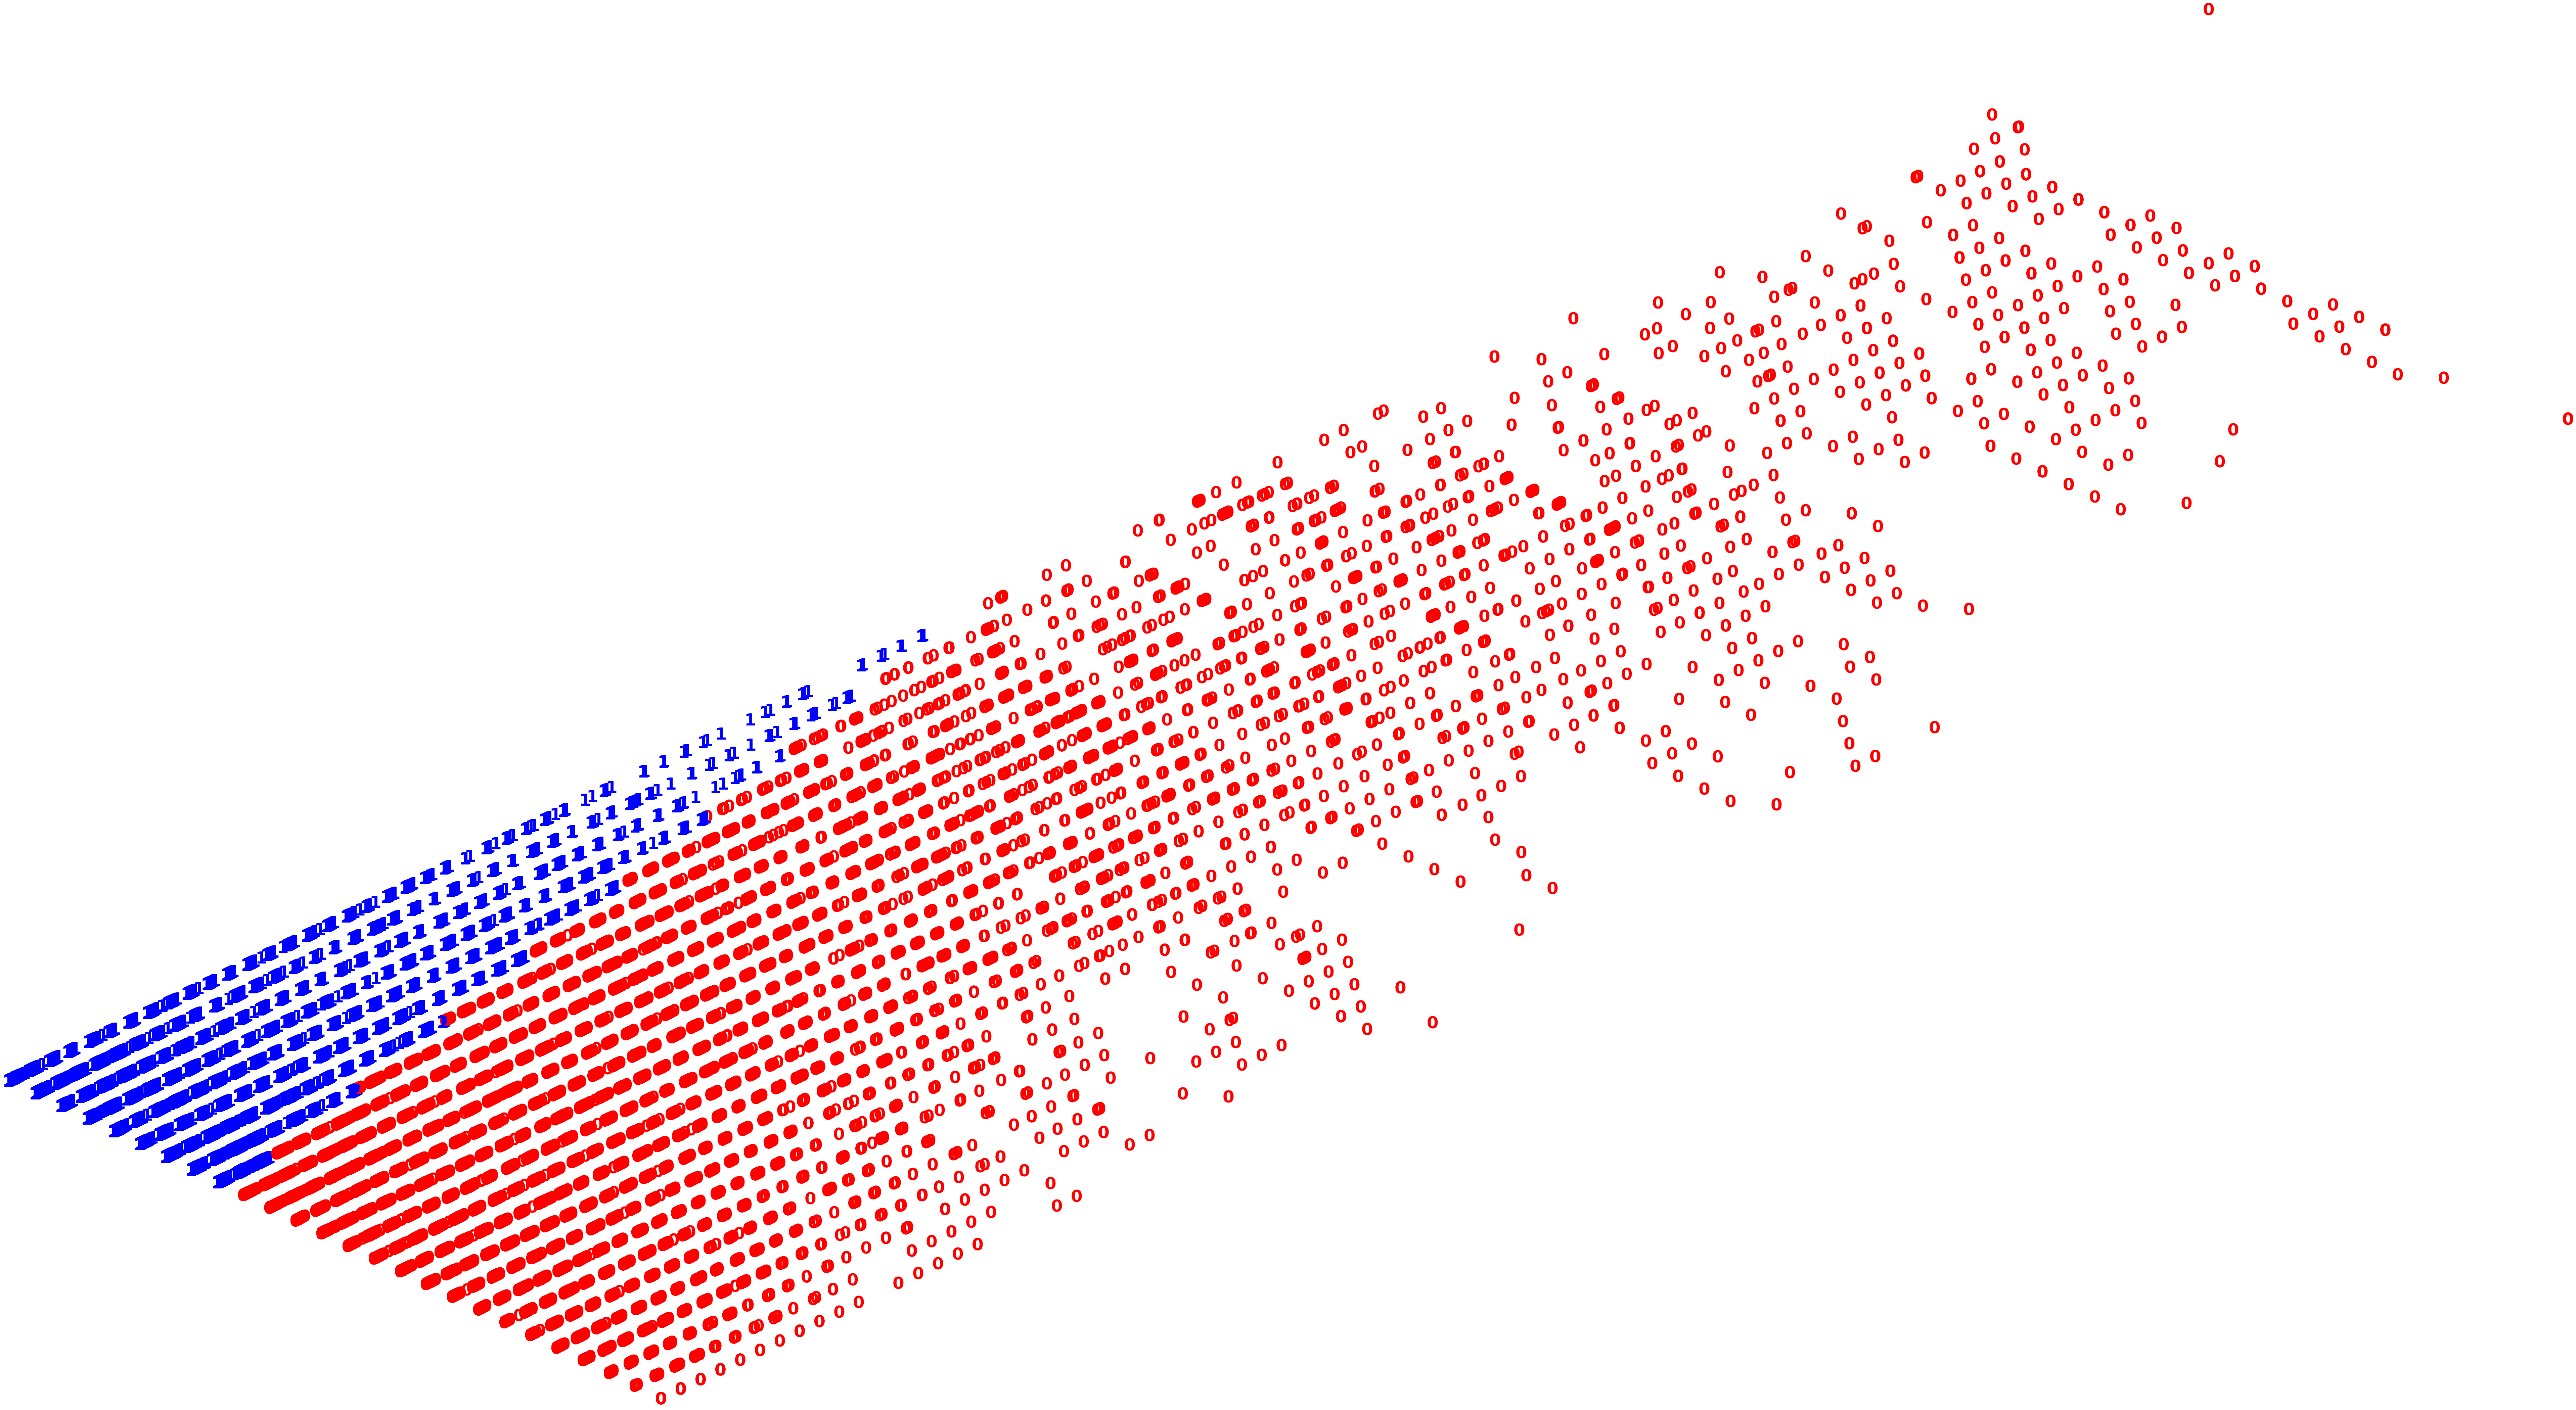

In [73]:
plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y_pred[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### Mini-batch K-means Clustering

In [74]:
# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=50)

1.26 s ± 87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


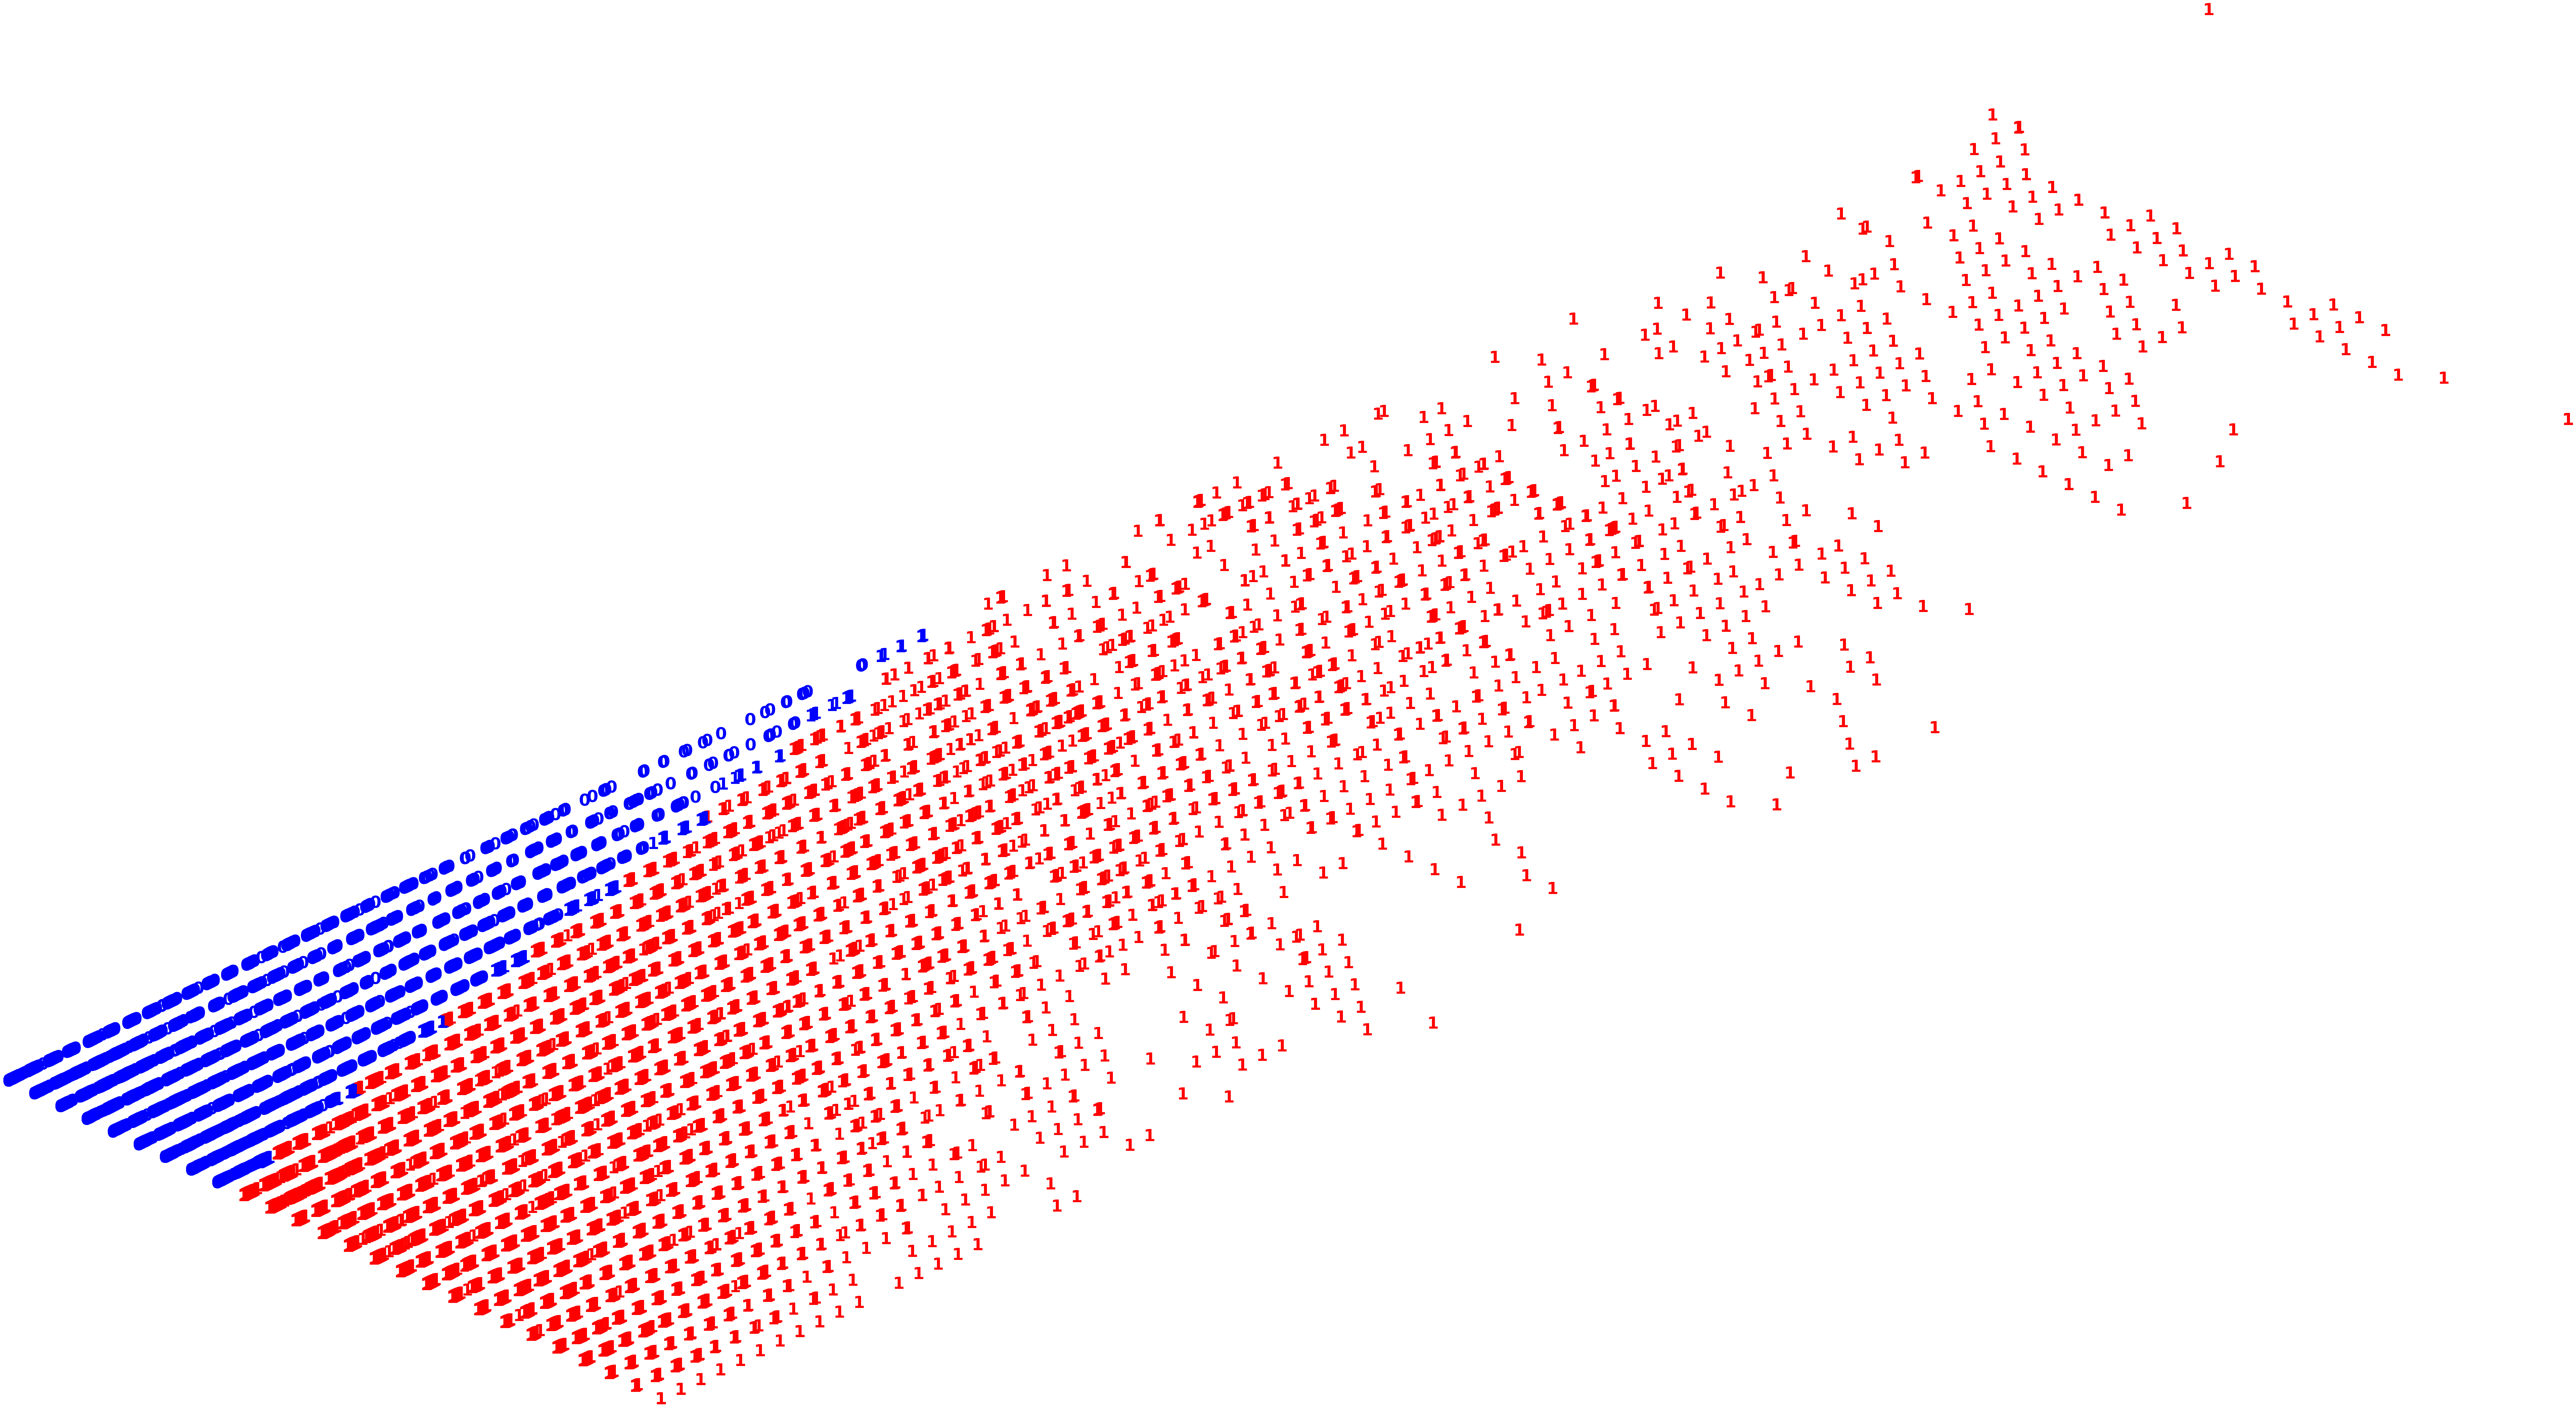

In [75]:
# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(minikmeans_cluster[i]),
             color=colours[y_pred[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [110]:
print("Adjusted Rand Index of the Mini-batch K-means solution: {}"
      .format(metrics.adjusted_rand_score(y_pred, minikmeans_cluster)))
print("The silhoutte score of the Mini-batch K-means solution: {}"
      .format(metrics.silhouette_score(X_std, minikmeans_cluster, metric='euclidean')))

Adjusted Rand Index of the Mini-batch K-means solution: 0.954266367759852
The silhoutte score of the Mini-batch K-means solution: 0.4591830603984475


The RI score of Mini-batch K-means is close to 1 and this is a good sign for the performance of our solution.

### Clustering with Gaussian Mixture Models (GMM)

In [76]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(
    n_components=2, 
    random_state=123)

474 ms ± 732 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


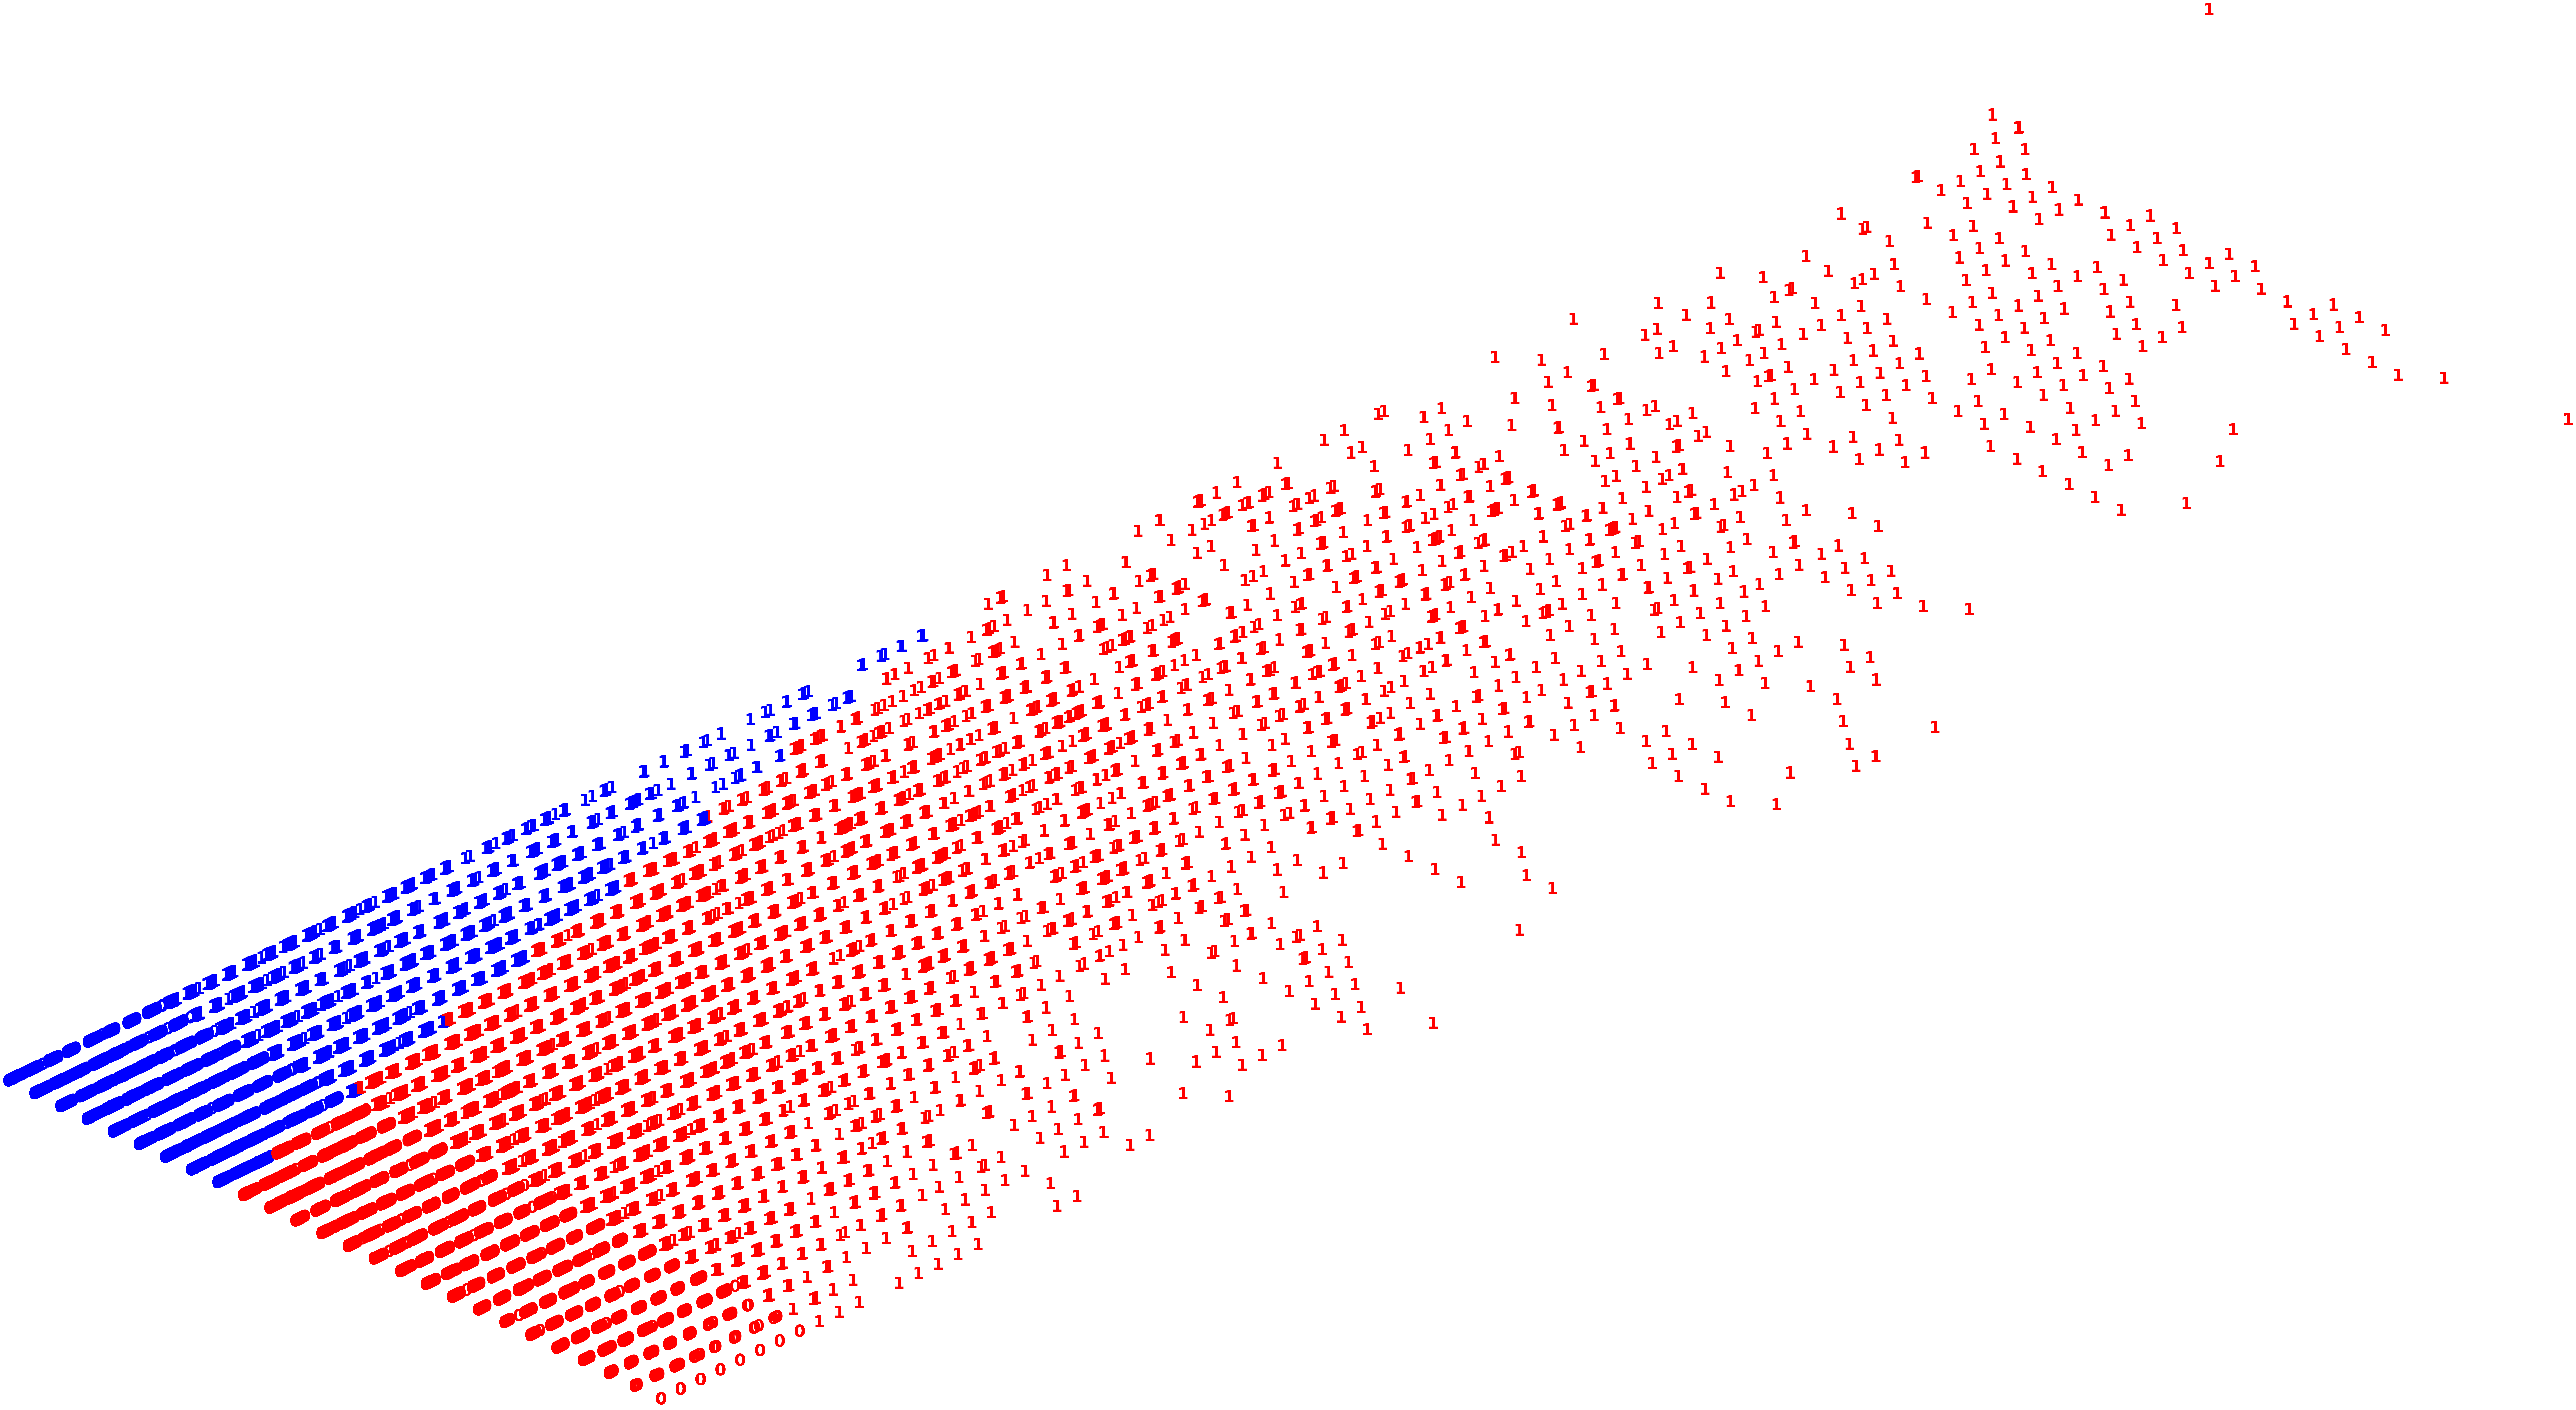

In [77]:
# Fit model
%timeit gmm_cluster.fit_predict(X_std)
gmm_cluster = gmm_cluster.fit_predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(gmm_cluster[i]),
             color=colours[y_pred[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [79]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y_pred, gmm_cluster)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, gmm_cluster, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.04454204601294084
The silhoutte score of the GMM solution: 0.4993832697993045


### Evaluating clusters

In [80]:
# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [81]:
# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

Let's apply k-means for the subsamples and get the predictions. To compare the results of different k-values, we apply k-means by setting k equal to 2, 3 and 4.

In [82]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

Now, we can visualize the results. We graph the clustering results for each of the subsamples, first for the two-cluster solution and then for three- and four-cluster ones.

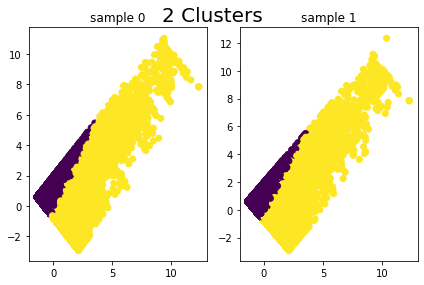

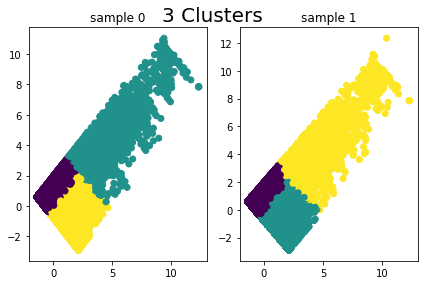

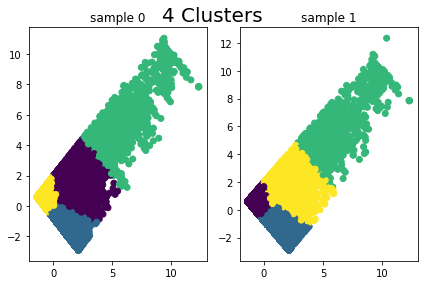

In [83]:
# For each  number of clusters, let's plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

Ignoring the specific colors assigned to each cluster, it appears that the four cluster solution seems to be consistent across the subsamples. 

### Contingency tables

Let's check the contingency table. A contingency table is a tabulation of the number of observations in each class against the clusters that are assigned to them.

In [84]:
# Get predicted clusters.
full_pred = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)

pd.crosstab(y_pred, full_pred) 

col_0,0,1,2,3
row_0,,,,
0,85084,4,1754,9301
1,8060,130923,28,3636


The result of Contingency table is not that amazing. Let's look at the Rand Index.

### The Rand Index

In [85]:
def rand_index_score(grount_truths, predictions):
    tp_plus_fp = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    tp_plus_fn = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    A = np.c_[(grount_truths, predictions)]
    tp = sum(scipy.special.comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(grount_truths))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = scipy.special.comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

In [86]:
rand_index_score(y_pred, full_pred)

0.8230895672005643

The RI score is quite close to 1, which is a good sign for the performance of our k-means solution. Let's look at the Adjusted Rand Index (ARI).

### Adjusted Rand Index

In [87]:
metrics.adjusted_rand_score(y_pred, full_pred)

0.7733300114909358

This tells us that our k-means clustering solution is closer to perfect than to random.

### Silhouette Coefficient

A good cluster is made up of datapoints that are more similar to one another than they are to datapoints in other clusters. One way of computing similarity is the silhouette coefficient.

In [88]:
labels = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.5070361817449767


It appears that our four-cluster solution produces clusters of datapoints that are closer to other datapoints in the cluster than they are to datapoints in the other clusters. This is good.

In [89]:
kmeans = KMeans(2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [90]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [91]:
Data_with_clusters = data_mapped.copy()
Data_with_clusters['Cluster'] = identified_clusters
Data_with_clusters

,stop_sequence,delay_minutes,departure,day,from_Hoboken,from_Sloatsburg,to_Tuxedo,line_No Jersey Coast,line_Northeast Corrdr,line_Princeton Shuttle,line_Raritan Valley,Cluster
0,1.0,0.000000,0,1,0,0,0,0,1,0,0,0
1,2.0,0.133333,0,1,0,0,0,0,1,0,0,0
2,3.0,0.116667,0,1,0,0,0,0,1,0,0,0
3,4.0,0.166667,0,1,0,0,0,0,1,0,0,0
4,5.0,0.166667,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238785,1.0,0.000000,0,31,0,0,0,0,0,0,0,0
238786,2.0,3.116667,0,31,0,0,0,0,0,0,0,0
238787,3.0,3.100000,0,31,0,0,0,0,0,0,0,0
238788,4.0,3.183333,0,31,0,0,0,0,0,0,0,0


<function matplotlib.pyplot.show(*args, **kw)>

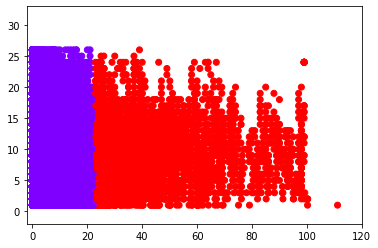

In [92]:
plt.scatter(Data_with_clusters['delay_minutes'], Data_with_clusters['stop_sequence'], c=Data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-2,120)
plt.ylim(-2,33)
plt.show

### Standardize the variable

In [93]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(X)
x_scaled

array([[-1.37460866, -0.53668783],
       [-1.17757554, -0.51677331],
       [-0.98054241, -0.51926263],
       ...,
       [-0.98054241, -0.07367527],
       [-0.78350929, -0.0612287 ],
       [-0.58647616,  0.66316191]])

### Take advantage of the Elbow method

In [94]:
wcss = []
for i in range (1,10):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[477579.9999999999,
 309227.07125182135,
 173399.45008442848,
 131891.86894211348,
 95625.47867271406,
 81371.43676382996,
 67766.2637959182,
 59994.96188186016,
 53066.25038565064]

Text(0, 0.5, 'WCSS')

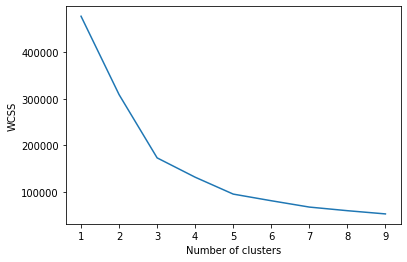

In [95]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Above plot shows that the proper nember of clusters should be 4 or 5. Let's try them and see which one is the proper one!

In [122]:
kmeans = KMeans(4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [129]:
identified_clusters_4 = kmeans.fit_predict(X)
identified_clusters_4

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [130]:
Data_with_clusters_4 = data_mapped.copy()
Data_with_clusters_4['Cluster'] = identified_clusters
Data_with_clusters_4

,stop_sequence,delay_minutes,departure,day,from_Hoboken,from_Sloatsburg,to_Tuxedo,line_No Jersey Coast,line_Northeast Corrdr,line_Princeton Shuttle,line_Raritan Valley,Cluster
0,1.0,0.000000,0,1,0,0,0,0,1,0,0,0
1,2.0,0.133333,0,1,0,0,0,0,1,0,0,0
2,3.0,0.116667,0,1,0,0,0,0,1,0,0,0
3,4.0,0.166667,0,1,0,0,0,0,1,0,0,0
4,5.0,0.166667,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238785,1.0,0.000000,0,31,0,0,0,0,0,0,0,0
238786,2.0,3.116667,0,31,0,0,0,0,0,0,0,0
238787,3.0,3.100000,0,31,0,0,0,0,0,0,0,0
238788,4.0,3.183333,0,31,0,0,0,0,0,0,0,0


<function matplotlib.pyplot.show(*args, **kw)>

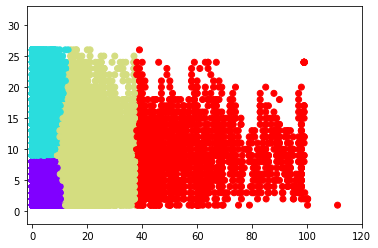

In [131]:
plt.scatter(Data_with_clusters_4['delay_minutes'], Data_with_clusters_4['stop_sequence'], c=Data_with_clusters_4['Cluster'], cmap = 'rainbow')
plt.xlim(-2,120)
plt.ylim(-2,33)
plt.show

Four clusters are clear to see and it shows that each stop point adds delay to each train. Let's try five clusters!

In [138]:
kmeans = KMeans(5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [139]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [140]:
Data_with_clusters_5 = data_mapped.copy()
Data_with_clusters_5['Cluster'] = identified_clusters
Data_with_clusters_5

,stop_sequence,delay_minutes,departure,day,from_Hoboken,from_Sloatsburg,to_Tuxedo,line_No Jersey Coast,line_Northeast Corrdr,line_Princeton Shuttle,line_Raritan Valley,Cluster
0,1.0,0.000000,0,1,0,0,0,0,1,0,0,3
1,2.0,0.133333,0,1,0,0,0,0,1,0,0,3
2,3.0,0.116667,0,1,0,0,0,0,1,0,0,3
3,4.0,0.166667,0,1,0,0,0,0,1,0,0,3
4,5.0,0.166667,0,1,0,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
238785,1.0,0.000000,0,31,0,0,0,0,0,0,0,3
238786,2.0,3.116667,0,31,0,0,0,0,0,0,0,3
238787,3.0,3.100000,0,31,0,0,0,0,0,0,0,3
238788,4.0,3.183333,0,31,0,0,0,0,0,0,0,3


<function matplotlib.pyplot.show(*args, **kw)>

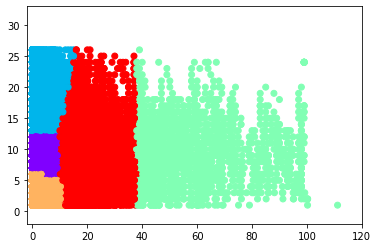

In [141]:
plt.scatter(Data_with_clusters_5['delay_minutes'], Data_with_clusters_5['stop_sequence'], c=Data_with_clusters_5['Cluster'], cmap = 'rainbow')
plt.xlim(-2,120)
plt.ylim(-2,33)
plt.show

As we dicovered on previous plot, adding one more cluster, just simply add another colored group to our data. Out of curiosity, let's see what do we get if we have six clusters, even though it wasn't suggested under the elbow method.

In [142]:
kmeans = KMeans(6)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [143]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([1, 1, 1, ..., 1, 1, 4], dtype=int32)

In [144]:
Data_with_clusters_6 = data_mapped.copy()
Data_with_clusters_6['Cluster'] = identified_clusters
Data_with_clusters_6

,stop_sequence,delay_minutes,departure,day,from_Hoboken,from_Sloatsburg,to_Tuxedo,line_No Jersey Coast,line_Northeast Corrdr,line_Princeton Shuttle,line_Raritan Valley,Cluster
0,1.0,0.000000,0,1,0,0,0,0,1,0,0,1
1,2.0,0.133333,0,1,0,0,0,0,1,0,0,1
2,3.0,0.116667,0,1,0,0,0,0,1,0,0,1
3,4.0,0.166667,0,1,0,0,0,0,1,0,0,1
4,5.0,0.166667,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
238785,1.0,0.000000,0,31,0,0,0,0,0,0,0,1
238786,2.0,3.116667,0,31,0,0,0,0,0,0,0,1
238787,3.0,3.100000,0,31,0,0,0,0,0,0,0,1
238788,4.0,3.183333,0,31,0,0,0,0,0,0,0,1


<function matplotlib.pyplot.show(*args, **kw)>

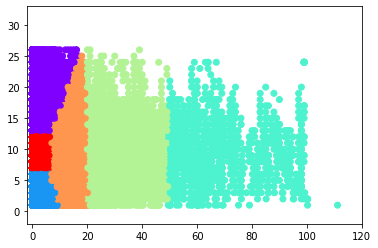

In [145]:
plt.scatter(Data_with_clusters_6['delay_minutes'], Data_with_clusters_6['stop_sequence'], c=Data_with_clusters_6['Cluster'], cmap = 'rainbow')
plt.xlim(-2,120)
plt.ylim(-2,33)
plt.show

It's interesting to see that we get a new group on the beginning of the plot. Adding more cluster doesn't make any difference in our final conclusion and we can just keep four clusters.

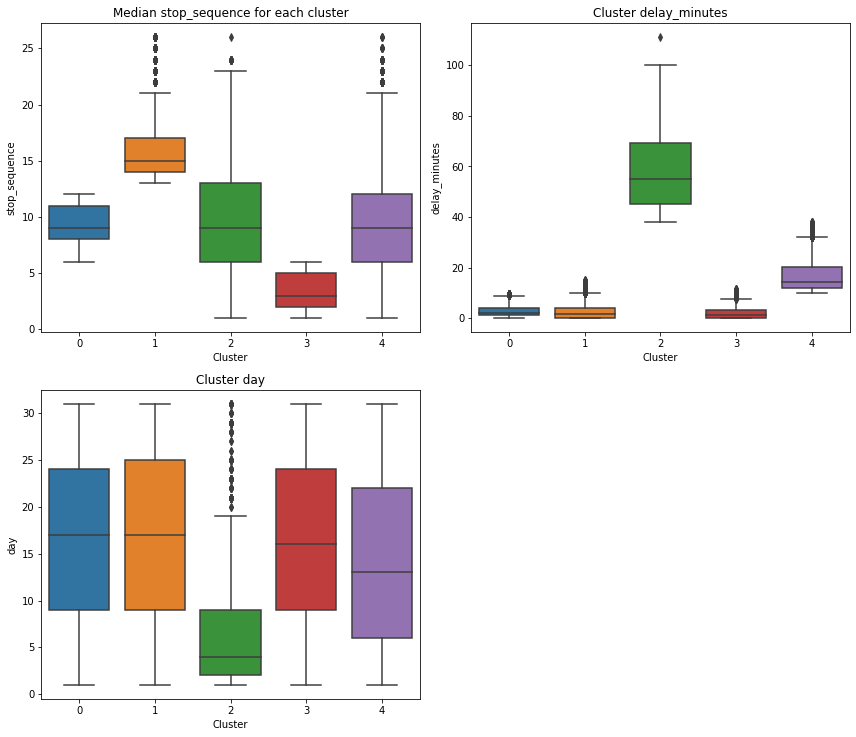

In [147]:
plt.figure(figsize=(12, 15))

plt.subplot(3, 2, 1)
sns.boxplot(x='Cluster', y='stop_sequence', data=Data_with_clusters_5)
plt.title('Median stop_sequence for each cluster')

plt.subplot(3, 2, 2)
sns.boxplot(x='Cluster', y='delay_minutes', data=Data_with_clusters_5)
plt.title('Cluster delay_minutes')

plt.subplot(3, 2, 3)
sns.boxplot(x='Cluster', y='day', data=Data_with_clusters_5)
plt.title('Cluster day')

plt.tight_layout()
plt.show()

<b>delay_minutes</b>: Clusters 1, 2 and 4 include the trains with less than 10 minutes delay time. Cluster 3 includes the train with higher than 40 minutes delay and Cluster 5 cover the delay time between 10 to 40 minutes.<br>
<b>day</b>: Cluster 3 holds the lowest values and it has lots of outliers.<br>
<b>stop_sequence</b>: Cluster 4 holds the lowest values.

The task of evaluating how well a supervised learning model performs is more straightforward. Because supervised learning models learn from labeled training data, once they have been fitted using training data, they can be tested against data from the same population and therefore has the same labels. But Clustering is the task of grouping a set of objects in such a way that objects in the same cluster are more like each other than they are to objects in other clusters. As our dataset includes a range of trains departure during a month with different time frame, clustering is a good method to use and we can apply further analysis on different cluster as we wish to.